# 📌Análisis del Ciclo de Vida del Cliente

### Introducción

Un pequeño proyecto que aborda desde el modelado de tablas, la limpieza y transformación de datos, almacenamiento utilizando SQLServer, hasta el visualización en PowerBI.

### Diagrama Entidad Relación

# 📌Librerías

En esta sección importamos las librerías necesarias para manipular, limpiar y procesar los datos.

In [2311]:
# Manipulación de datos
import pandas as pd
import numpy as np

In [2312]:
# Visualización de datos
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2313]:
# Para manejar rutas
import os

In [2314]:
# Para conectar a sql
from sqlalchemy import create_engine, text

# 📌Configuración de parámetros

In [2316]:
# Obtenemos la ruta base donde está este archivo
path_base = os.getcwd()

# Nombre del archivo
nombre_archivo = "data.xlsx"

# 📌Carga de datos

In [2318]:
# Cargamos los datos
try:
    path_ventas = os.path.join(path_base, "database", nombre_archivo)
    df_ventas = pd.read_excel(path_ventas)
    print(f"✅ Los datos han sido cargados correctamente. Filas:{len(df_ventas)}")
except:
    print(f"❌ Error: El archivo '{nombre_archivo}' no se encuentra en la ruta: {path_ventas}")
    df_ventas = None

✅ Los datos han sido cargados correctamente. Filas:9994


# 📌Análisis Exploratorio de Datos

In [2320]:
# Vistazo inicial
df_ventas.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Retail Sales People,Product ID,Category,Sub-Category,Product Name,Returned,Sales,Quantity,Discount,Profit
0,646,CA-2017-126221,2017-12-30,2018-05-01,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,...,Kelly Williams,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,Not,209.30,2,0.0,125.580
1,5132,CA-2017-146626,2017-12-29,2018-05-01,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Anaheim,...,Anna Andreadi,FUR-FU-10002501,Furniture,Furnishings,Nu-Dell Executive Frame,Not,101.12,8,0.0,60.672
2,571,CA-2017-164826,2017-12-28,2018-04-01,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,...,Chuck Magee,OFF-LA-10001297,Office Supplies,Labels,Avery 473,Not,72.45,7,0.0,43.470


In [2321]:
# Estadísticas descriptivas
df_ventas.describe().T

,count,mean,min,25%,50%,75%,max,std
Row ID,9994.0,4997.5,1.0,2499.25,4997.5,7495.75,9994.0,2885.163629
Order Date,9994,2016-04-11 07:17:44.078447104,2014-01-02 00:00:00,2015-05-01 00:00:00,2016-05-30 00:00:00,2017-04-09 00:00:00,2017-12-30 00:00:00,NaN
Ship Date,9994,2016-05-15 21:54:47.332399360,2014-01-15 00:00:00,2015-06-20 00:00:00,2016-07-21 00:00:00,2017-06-02 00:00:00,2018-05-01 00:00:00,NaN
Postal Code,9994.0,55190.379428,1040.0,23223.0,56430.5,90008.0,99301.0,32063.69335
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9987.0,0.156312,0.0,0.0,0.2,0.2,0.8,0.206483
Profit,9994.0,137.9148,0.2664,10.368,32.694,125.964,13583.088,373.94706


In [2322]:
# Tipo de datos y valores nulos
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Row ID               9994 non-null   int64         
 1   Order ID             9994 non-null   object        
 2   Order Date           9994 non-null   datetime64[ns]
 3   Ship Date            9994 non-null   datetime64[ns]
 4   Ship Mode            9994 non-null   object        
 5   Customer ID          9994 non-null   object        
 6   Customer Name        9994 non-null   object        
 7   Segment              9994 non-null   object        
 8   Country              9994 non-null   object        
 9   City                 9994 non-null   object        
 10  State                9994 non-null   object        
 11  Postal Code          9994 non-null   int64         
 12  Region               9994 non-null   object        
 13  Retail Sales People  9994 non-nul

**Valores unicos**

In [2324]:
# Valores unicos de Segment
print("Valores únicos en Segment: ", df_ventas.Segment.unique())

Valores únicos en Segment:  ['Home Office' 'Corporate' 'Consumer']


In [2325]:
# Valores unicos de Country
print("Valores únicos en Country: ", df_ventas.Country.unique())

Valores únicos en Country:  ['United States']


In [2326]:
# Valores unicos de Region
print("Valores únicos en Region: ", df_ventas.Region.unique())

Valores únicos en Region:  ['Central' 'West' 'East' 'South']


In [2327]:
# Valores unicos de Vendedores
print("Valores únicos en Vendedores: ", df_ventas["Retail Sales People"].unique())

Valores únicos en Vendedores:  ['Kelly Williams' 'Anna Andreadi' 'Chuck Magee' 'Cassandra Brandow']


In [2328]:
# Valores unicos de Category
print("Valores únicos en Categorias: ", df_ventas.Category.unique())

Valores únicos en Categorias:  ['Office Supplies' 'Furniture' 'Technology']


In [2329]:
# Valores unicos de Sub-Category
print("Valores únicos en Sub-Categorias: ", df_ventas["Sub-Category"].unique())

Valores únicos en Sub-Categorias:  ['Appliances' 'Furnishings' 'Labels' 'Fasteners' 'Binders' 'Phones'
 'Paper' 'Bookcases' 'Storage' 'Chairs' 'Art' 'Supplies' 'Accessories'
 'Tables' 'Machines' 'Envelopes' 'Copiers']


In [2330]:
# Valores unicos en Returned
print("Valores únicos en Retornado: ", df_ventas.Returned.unique())

Valores únicos en Retornado:  ['Not' 'Yes']


**Valores atípicos**

In [2332]:
df_numerico = df_ventas.select_dtypes(include="number")

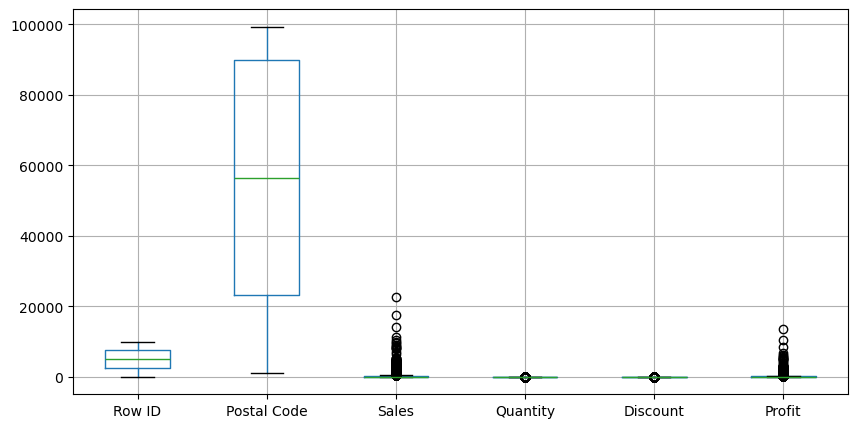

In [2333]:
# Graficamos boxplot
plt.figure(figsize=(10,5))
df_numerico.boxplot()

plt.show()

**Valores duplicados**

In [2335]:
# Duplicados
print("Cantidad de registros duplicados:",df_ventas.duplicated().sum())

Cantidad de registros duplicados: 0


**--RESUMEN--**

**Valores nulos:**  
- Se detectaron 7 valores nulos en *Discount*.

**Tipos de datos:**  
- Los tipos de datos están correctos.

**Valores duplicados:**  
- No hay registros duplicados.

**Datos categóricos:**  
- No hay errores en los datos categoricos.

**Datos atípicos:**  
- Los outliers son controlables.

In [2337]:
# Explorando más a fondo los valores nulos en Discount
df_ventas[ df_ventas.Discount.isna() ]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Retail Sales People,Product ID,Category,Sub-Category,Product Name,Returned,Sales,Quantity,Discount,Profit
9986,1914,CA-2014-103366,2014-01-15,2014-01-17,First Class,EH-13990,Erica Hackney,Consumer,United States,Roswell,...,Cassandra Brandow,TEC-AC-10003628,Technology,Accessories,Logitech 910-002974 M325 Wireless Mouse for We...,Not,149.95,5,NaN,89.970
9987,2979,CA-2014-109232,2014-01-13,2014-01-16,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,...,Cassandra Brandow,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,Not,545.94,6,NaN,327.564
9988,764,CA-2014-162775,2014-01-13,2014-01-15,Second Class,CS-12250,Chris Selesnick,Corporate,United States,Bossier City,...,Cassandra Brandow,OFF-EN-10001990,Office Supplies,Envelopes,Staple envelope,Not,11.36,2,NaN,6.816
9989,765,CA-2014-162775,2014-01-13,2014-01-15,Second Class,CS-12250,Chris Selesnick,Corporate,United States,Bossier City,...,Cassandra Brandow,OFF-EN-10001532,Office Supplies,Envelopes,Brown Kraft Recycled Envelopes,Not,50.94,3,NaN,30.564
9990,766,CA-2014-162775,2014-01-13,2014-01-15,Second Class,CS-12250,Chris Selesnick,Corporate,United States,Bossier City,...,Cassandra Brandow,TEC-AC-10003174,Technology,Accessories,Plantronics S12 Corded Telephone Headset System,Not,646.74,6,NaN,388.044
9991,767,CA-2014-162775,2014-01-13,2014-01-15,Second Class,CS-12250,Chris Selesnick,Corporate,United States,Bossier City,...,Cassandra Brandow,OFF-BI-10004187,Office Supplies,Binders,3-ring staple pack,Not,5.64,3,NaN,3.384
9992,768,CA-2014-162775,2014-01-13,2014-01-15,Second Class,CS-12250,Chris Selesnick,Corporate,United States,Bossier City,...,Cassandra Brandow,OFF-ST-10000025,Office Supplies,Storage,Fellowes Stor/Drawer Steel Plus Storage Drawers,Not,572.58,6,NaN,343.548


# 📌Transformación y limpieza de datos

### Valores nulos
En la sección anterior vimos los valores nulos en la columna Discount, a grandes rasgos no se encontró ninguna relación con las demás columnas, por lo que decidí solamente reemplazar los valores nulos por 0 dando a entender que no se aplicó ningún descuento.

In [2340]:
# Rellenamos valores nulos
df_ventas["Discount"] = df_ventas["Discount"].fillna(0)

In [2341]:
# Verificamos la corección
print("Cantidad de valores nulos en Discount:",df_ventas.Discount.isna().sum())

Cantidad de valores nulos en Discount: 0


### Tablas  
Usando el DER de referencia vamos armando cada una de las tablas con el archivo base *df_ventas*.

**TABLA: dimCliente**

In [2344]:
# Seleccionamos las columnas necesarias
dimCliente = df_ventas[["Customer ID", "Customer Name", "Segment"]].copy()

In [2345]:
# Eliminamos duplicados y resetamos el indice
dimCliente = dimCliente.drop_duplicates(subset=["Customer ID"]).reset_index(drop = True)

In [2346]:
# Renombramos las columnas para que coincidan con el der
dimCliente = dimCliente.rename(columns={"Customer ID":"CustomerID", "Customer Name":"Name"})

In [2347]:
# Validamos el resultado
dimCliente.head()

,CustomerID,Name,Segment
0,CC-12430,Chuck Clark,Home Office
1,BP-11185,Ben Peterman,Corporate
2,JF-15415,Jennifer Ferguson,Consumer
3,KB-16600,Ken Brennan,Corporate
4,PO-18865,Patrick O'Donnell,Consumer


**TABLA: dimVendedor**

In [2349]:
dimVendedor = df_ventas[["Retail Sales People"]].copy()

Solo disponemos de la columna con los nombres, debemos crear una columna de ID

In [2351]:
# Eliminamos duplicados y reseteamos el indice
dimVendedor = dimVendedor.drop_duplicates().reset_index(drop=True)

In [2352]:
# Creamos el indice a partir del indice
dimVendedor["SalesPersonID"] = dimVendedor.index + 1

In [2353]:
# Renombramos las columnas
dimVendedor = dimVendedor.rename(columns={"Retail Sales People":"Name"})

In [2354]:
# Validamos el resultado
dimVendedor.head()

,Name,SalesPersonID
0,Kelly Williams,1
1,Anna Andreadi,2
2,Chuck Magee,3
3,Cassandra Brandow,4


**TABLA: dimModoEntrega**

Debemos crear una columna ID

In [2357]:
dimModoEntrega = df_ventas[["Ship Mode"]].copy()

In [2358]:
dimModoEntrega = dimModoEntrega.drop_duplicates().reset_index(drop=True)

In [2359]:
dimModoEntrega["ShipModeID"] = dimModoEntrega.index + 1

In [2360]:
dimModoEntrega = dimModoEntrega.rename(columns={"Ship Mode":"ShipMode"})

In [2361]:
dimModoEntrega.head()

,ShipMode,ShipModeID
0,Standard Class,1
1,Second Class,2
2,First Class,3
3,Same Day,4


**TABLA: dimRegion**

In [2363]:
dimRegion = df_ventas[["Postal Code", "Country", "City", "Region", "State"]].copy()

In [2364]:
dimRegion = dimRegion.drop_duplicates().reset_index(drop=True)

In [2365]:
dimRegion.duplicated().sum()

0

In [2366]:
# Renombramos las columnas
dimRegion = dimRegion.rename(columns={"Postal Code":"PostalCode"})

In [2367]:
# Creamos la columna RegionID
dimRegion["RegionID"] = dimRegion.index + 1

In [2368]:
dimRegion.head()

,PostalCode,Country,City,Region,State,RegionID
0,47201,United States,Columbus,Central,Indiana,1
1,92804,United States,Anaheim,West,California,2
2,10024,United States,New York City,East,New York,3
3,49505,United States,Grand Rapids,Central,Michigan,4
4,10009,United States,New York City,East,New York,5


**TABLA: dimProducto**

In [2370]:
dimProducto = df_ventas[["Product ID", "Product Name", "Category", "Sub-Category"]].copy()

In [2371]:
dimProducto = dimProducto.drop_duplicates().reset_index(drop=True)

In [2372]:
dimProducto["ProductID"] = dimProducto.index + 1

In [2373]:
# Renombramos las columnas
dimProducto = dimProducto.rename(columns={"Product ID":"Code", "Product Name":"Name", "Sub-Category":"SubCategory"})

In [2374]:
dimProducto.head()

,Code,Name,Category,SubCategory,ProductID
0,OFF-AP-10002457,Eureka The Boss Plus 12-Amp Hard Box Upright V...,Office Supplies,Appliances,1
1,FUR-FU-10002501,Nu-Dell Executive Frame,Furniture,Furnishings,2
2,OFF-LA-10001297,Avery 473,Office Supplies,Labels,3
3,OFF-FA-10000585,OIC Bulk Pack Metal Binder Clips,Office Supplies,Fasteners,4
4,OFF-BI-10001922,Storex Dura Pro Binders,Office Supplies,Binders,5


**TABLA: factDetalles**

In [2376]:
factDetalles = df_ventas[["Order ID", "Product ID", "Quantity", "Sales", "Discount", "Profit"]].copy()

In [2377]:
factDetalles.drop_duplicates(subset=["Order ID", "Product ID"],inplace=True)

In [2378]:
# Obtenemos el indice de dimProducto
factDetalles = factDetalles.merge(dimProducto, left_on="Product ID", right_on="Code")

In [2379]:
del factDetalles["Product ID"]
del factDetalles["Code"]
del factDetalles["Name"]
del factDetalles["Category"]
del factDetalles["SubCategory"]

In [2380]:
factDetalles = factDetalles.rename(columns={"Order ID":"OrderID"})

In [2381]:
factDetalles.tail(3)

,OrderID,Quantity,Sales,Discount,Profit,ProductID
10319,CA-2014-162775,3,5.64,0.0,3.384,1497
10320,CA-2014-162775,6,572.58,0.0,343.548,902
10321,CA-2014-149524,4,61.96,0.5,37.176,1447


**TABLA: factVentas**

In [2383]:
temp_ventas = df_ventas[["Row ID", "Customer ID", "Retail Sales People", "Order ID", "Ship Mode", "Postal Code", "Order Date", "Returned", "Ship Date"]].copy()

Las columnas *Retail Sales People*, *Ship Mode* y *Order ID* deben ser cambiadas por los respectivos IDs creados en las tablas de dimensión.  
Para ello haremos un merge.

In [2385]:
temp_ventas = temp_ventas.merge(dimVendedor, left_on= "Retail Sales People", right_on="Name")

In [2386]:
del temp_ventas["Name"]
del temp_ventas["Retail Sales People"]

In [2387]:
temp_ventas.tail(2)

,Row ID,Customer ID,Order ID,Ship Mode,Postal Code,Order Date,Returned,Ship Date,SalesPersonID
9992,768,CS-12250,CA-2014-162775,Second Class,71111,2014-01-13,Not,2014-01-15,4
9993,6475,BS-11590,CA-2014-149524,First Class,19140,2014-01-14,Not,2014-01-15,3


In [2388]:
temp_ventas = temp_ventas.merge(dimModoEntrega, left_on="Ship Mode", right_on="ShipMode")

In [2389]:
del temp_ventas["Ship Mode"]
del temp_ventas["ShipMode"]

In [2390]:
temp_ventas = temp_ventas.merge(dimRegion, left_on="Postal Code", right_on="PostalCode")

In [2391]:
del temp_ventas["Postal Code"]
del temp_ventas["PostalCode"]
del temp_ventas["Country"]
del temp_ventas["City"]
del temp_ventas["Region"]
del temp_ventas["State"]

In [2392]:
factVentas = temp_ventas.reset_index(drop=True).copy()

In [2393]:
factVentas = factVentas.rename(columns={"Row ID":"RowID", "Customer ID":"CustomerID", "Order ID":"OrderID", "Order Date":"OrderDate", "Ship Date":"ShipDate"})

factDetalles funciona como tabla puente entre factVentas y dimProducto, por lo tanto la columna *RowID* no tiene sentido en este modelo de datos, lo borraremos y eliminaremos duplicados. OrderID quedaría como PK en factVentas y parte de la clave combinada en factDetalles

In [2395]:
del factVentas["RowID"]

In [2396]:
print("Valores duplicados:", factVentas.duplicated().sum())

Valores duplicados: 5001


In [2397]:
factVentas = factVentas.drop_duplicates().reset_index(drop=True)

In [2398]:
factVentas.tail(3)

,CustomerID,OrderID,OrderDate,Returned,ShipDate,SalesPersonID,ShipModeID,RegionID
5029,ND-18370,CA-2014-109232,2014-01-13,Not,2014-01-16,4,2,632
5030,CS-12250,CA-2014-162775,2014-01-13,Not,2014-01-15,4,2,617
5031,BS-11590,CA-2014-149524,2014-01-14,Not,2014-01-15,3,3,95


In [2500]:
print("Cantidad de valores duplicados:",factVentas.OrderID.duplicated().sum())

Cantidad de valores duplicados: 23


In [2510]:
# Suponiendo que tu DataFrame se llama df_fact_ventas

# Encontrar los OrderIDs que aparecen más de una vez
ordenes_duplicadas = factVentas[factVentas.duplicated(subset=['OrderID'], keep=False)]

# Contar cuántas veces se repite cada OrderID duplicado
ordenes_duplicadas

# Opcional: ver las filas completas de los duplicados
# print(ordenes_duplicadas)

,CustomerID,OrderID,OrderDate,Returned,ShipDate,SalesPersonID,ShipModeID,RegionID
78,RA-19915,CA-2017-140585,2017-12-18,Yes,2017-12-23,2,2,65
79,RA-19915,CA-2017-140585,2017-12-18,Yes,2017-12-23,2,2,84
108,MP-18175,CA-2017-169859,2017-12-14,Yes,2017-12-18,2,1,65
109,MP-18175,CA-2017-169859,2017-12-14,Yes,2017-12-18,2,1,84
1083,SW-20455,CA-2017-145429,2017-07-21,Not,2017-07-25,2,1,65
1084,SW-20455,CA-2017-145429,2017-07-21,Not,2017-07-25,2,1,84
1111,NP-18325,CA-2017-126865,2017-05-12,Not,2017-07-12,2,2,65
1112,NP-18325,CA-2017-126865,2017-05-12,Not,2017-07-12,2,2,84
1602,TC-21295,CA-2017-136875,2017-03-12,Not,2017-03-12,2,4,65
1603,TC-21295,CA-2017-136875,2017-03-12,Not,2017-03-12,2,4,84


# 📌Exportación de Datos

In [2402]:
# Exportación de los datasets

path_guardado = os.path.join(path_base, "database")

# Diccionario de los datasets para exportar 
dataframes = {
    'dimCliente': dimCliente,
    'dimVendedor': dimVendedor,
    'dimModoEntrega': dimModoEntrega,
    'dimRegion': dimRegion,
    'dimProducto': dimProducto,
    'factVentas': factVentas,
    'factDetalles': factDetalles
}

for nombre, df in dataframes.items():

    nombre_archivo = f"{nombre}.csv"
    
    path_completo = os.path.join(path_guardado, nombre_archivo)

    df.to_csv(path_completo, index=False, mode='w')

In [2403]:
# Para futuros cambios
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

In [2404]:
# Carga de las variables desde el archivo privado .env
load_dotenv() 

# Usar las variables para construir la cadena de conexión
server = os.getenv('DB_SERVER')
database = os.getenv('DB_NAME')

In [2405]:
if server and database:
    connection_string = f'mssql+pyodbc://{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'
    
    try:
        engine = create_engine(connection_string)
        print("✅ Conexión con SQL Server establecida usando variables de entorno.")
    except Exception as e:
        print(f"❌ Error al conectar: {e}")
else:
    print("❌ Error: Las variables de entorno para el servidor o la base de datos no están configuradas.")

✅ Conexión con SQL Server establecida usando variables de entorno.


❕ Las tablas ya están creadas previamente

In [2407]:
if engine is not None:
    # Diccionario con los nombres de las tablas y sus DataFrames
    dataframes_a_cargar = {
        'dimCliente': dimCliente,
        'dimVendedor': dimVendedor,
        'dimModoEntrega': dimModoEntrega,
        'dimRegion': dimRegion,
        'dimProducto': dimProducto,
        'factVentas': factVentas,
        'factDetalles': factDetalles
    }

    print("\nIniciando la carga de datos a SQL Server...")

    try:
        for nombre, df in dataframes_a_cargar.items():
            # if_exists="append" agregará los datos a la tabla existente
            
            df.to_sql(nombre, con=engine, if_exists='append', index=False)
            print(f"✅ Datos de '{nombre}' cargados correctamente.")
        
        print("\n🎉 ¡Todos los DataFrames han sido cargados a SQL Server con éxito!")

    except Exception as e:
        print(f"❌ Error al cargar los datos: {e}")
        print("Esto podría deberse a un problema de tipos de datos o a que las columnas no coinciden.")

    finally:
        if 'engine' in locals():
            engine.dispose()
            print("✅ Conexión con la base de datos cerrada.")


Iniciando la carga de datos a SQL Server...
✅ Datos de 'dimCliente' cargados correctamente.
✅ Datos de 'dimVendedor' cargados correctamente.
✅ Datos de 'dimModoEntrega' cargados correctamente.
✅ Datos de 'dimRegion' cargados correctamente.
✅ Datos de 'dimProducto' cargados correctamente.
❌ Error al cargar los datos: (pyodbc.IntegrityError) ('23000', "[23000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Violation of PRIMARY KEY constraint 'PK__factVent__C3905BAFC9B0744F'. Cannot insert duplicate key in object 'dbo.factVentas'. The duplicate key value is (CA-2017-140585). (2627) (SQLExecDirectW); [23000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]The statement has been terminated. (3621)")
[SQL: INSERT INTO [factVentas] ([CustomerID], [OrderID], [OrderDate], [Returned], [ShipDate], [SalesPersonID], [ShipModeID], [RegionID]) VALUES (?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ? ... 6598 characters trunc